In [ ]:
#import libraries
import pandas as pd
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
# prompt: import df.csv from my drive

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/flights.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-13-b49a2d5bc266>:25: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/flights.csv')


In [ ]:
print(df.head())
print(df.info())

   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
0            ANC                 SEA                    5  ...         408.0   
1            LAX                 PBI                   10  ...         741.0   
2            SFO                 CLT                   20  ...         811.0   
3            LAX                 MIA                   20  ...         756.0   
4            SEA                 ANC                   25  ...         259.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0          -

In [ ]:
df_needed_data = df[0:100000]

In [ ]:
df_needed_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2015,1,7,3,EV,4992,N837AS,ATL,BQK,1108,...,1208.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
99996,2015,1,7,3,NK,394,N522NK,LAS,PHL,1108,...,1844.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
99997,2015,1,7,3,OO,5606,N582SW,SFO,BFL,1108,...,1232.0,7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
99998,2015,1,7,3,UA,1135,N38473,ORD,MCO,1109,...,1453.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_needed_data.value_counts('DIVERTED')

,count
DIVERTED,
0,99776
1,224


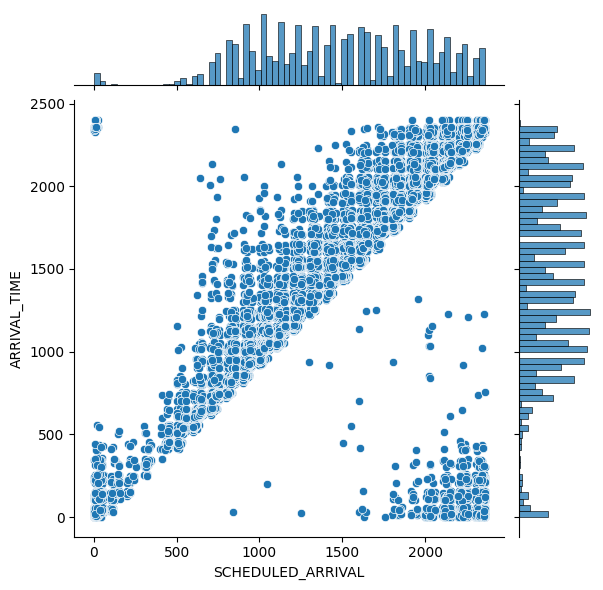

In [ ]:
sb.jointplot(data=df_needed_data, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME")

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical columns
label_encoder = LabelEncoder()
for col in df_needed_data.select_dtypes(include=['object']).columns:
    df_needed_data[col] = label_encoder.fit_transform(df_needed_data[col])

# Recompute the correlation matrix
corr = df_needed_data.corr(method='pearson')


<ipython-input-21-1ab1459ecab4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_needed_data[col] = label_encoder.fit_transform(df_needed_data[col])
<ipython-input-21-1ab1459ecab4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_needed_data[col] = label_encoder.fit_transform(df_needed_data[col])
<ipython-input-21-1ab1459ecab4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

<Axes: >

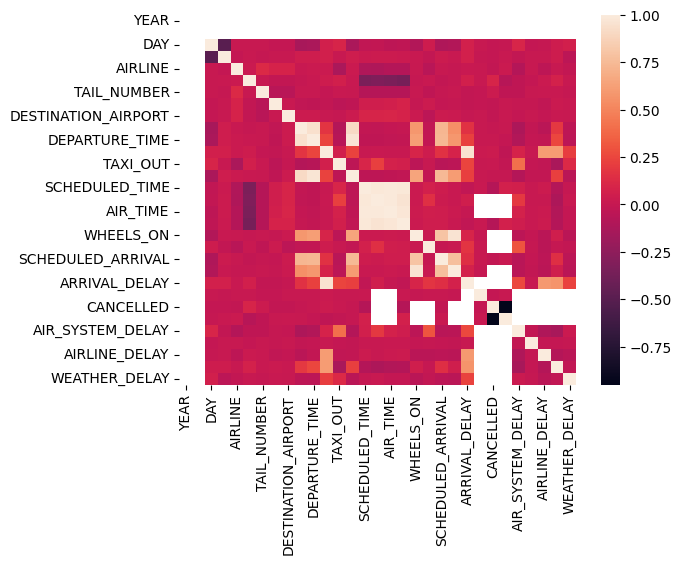

In [ ]:
sb.heatmap(corr)

In [ ]:
corr

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY,NaN,NaN,1.000000,-0.497084,0.006910,0.004412,0.005055,-0.007169,-0.010691,-0.138130,...,-0.091687,0.070770,0.004847,-0.006000,-0.001396,0.097693,-0.010550,-0.001603,0.033213,0.061960
DAY_OF_WEEK,NaN,NaN,-0.497084,1.000000,-0.006805,0.010955,0.000751,0.005382,0.007027,0.046914,...,0.011477,0.067520,-0.000709,-0.006409,0.014890,-0.019626,0.008156,0.003648,0.033729,-0.050835
AIRLINE,NaN,NaN,0.006910,-0.006805,1.000000,0.021056,0.120763,0.082349,0.084248,0.011524,...,0.001057,0.010058,0.006660,-0.018330,0.018010,-0.081778,0.006425,-0.036262,0.002804,-0.020266
FLIGHT_NUMBER,NaN,NaN,0.004412,0.010955,0.021056,1.000000,0.009600,-0.020462,-0.017037,-0.003027,...,0.000753,0.056163,0.007155,0.090008,-0.072532,-0.032564,-0.007260,0.023770,0.076581,0.004246
TAIL_NUMBER,NaN,NaN,0.005055,0.000751,0.120763,0.009600,1.000000,-0.061085,-0.062946,0.004220,...,0.004876,-0.015254,-0.005613,0.028566,-0.033196,-0.034983,0.003798,0.015796,0.012678,0.001048
ORIGIN_AIRPORT,NaN,NaN,-0.007169,0.005382,0.082349,-0.020462,-0.061085,1.000000,0.012267,-0.024461,...,0.000497,-0.015636,-0.006041,-0.013540,0.009375,-0.002293,0.001716,-0.021859,0.019141,0.013728
DESTINATION_AIRPORT,NaN,NaN,-0.010691,0.007027,0.084248,-0.017037,-0.062946,0.012267,1.000000,0.031728,...,0.021035,-0.004426,0.003020,-0.015554,0.010984,-0.007308,0.003234,-0.006869,0.010079,0.006194
SCHEDULED_DEPARTURE,NaN,NaN,-0.138130,0.046914,0.011524,-0.003027,0.004220,-0.024461,0.031728,1.000000,...,0.552653,0.154951,0.002515,-0.002631,0.002703,-0.112393,-0.017957,-0.054419,0.186286,-0.042004


In [ ]:
df_needed_data=df_needed_data.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT',
                                              'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME',
                                              'AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON'],
                                             axis=1)

In [ ]:
df_needed_data

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,15,268,5,-11.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN
1,1,1,168,226,10,-8.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
2,1,1,269,62,20,-2.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN
3,1,1,168,195,20,-5.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
4,1,1,268,15,25,-1.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,7,18,37,1108,-6.0,1219,1208.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN
99996,1,7,166,229,1108,9.0,1842,1844.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN
99997,1,7,269,26,1108,-7.0,1225,1232.0,7.0,0,0,NaN,NaN,NaN,NaN,NaN
99998,1,7,219,185,1109,7.0,1454,1453.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# replacing all NaN values with the mean of the attribute in which they are present
df_needed_data=df_needed_data.fillna(df_needed_data.mean())

In [ ]:
df_needed_data

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,15,268,5,-11.0,430,408.0,-22.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971
1,1,1,168,226,10,-8.0,750,741.0,-9.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971
2,1,1,269,62,20,-2.0,806,811.0,5.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971
3,1,1,168,195,20,-5.0,805,756.0,-9.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971
4,1,1,268,15,25,-1.0,320,259.0,-21.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,7,18,37,1108,-6.0,1219,1208.0,-11.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971
99996,1,7,166,229,1108,9.0,1842,1844.0,2.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971
99997,1,7,269,26,1108,-7.0,1225,1232.0,7.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971
99998,1,7,219,185,1109,7.0,1454,1453.0,-1.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971


In [ ]:
# creating a new column; it will tell if the flight was delayed or not
result=[]

In [ ]:
for row in df_needed_data['ARRIVAL_DELAY']:
  if row > 15:
    result.append(1)
  else:
    result.append(0)

In [ ]:
df_needed_data['result'] = result
df_needed_data

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,1,1,15,268,5,-11.0,430,408.0,-22.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
1,1,1,168,226,10,-8.0,750,741.0,-9.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
2,1,1,269,62,20,-2.0,806,811.0,5.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
3,1,1,168,195,20,-5.0,805,756.0,-9.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
4,1,1,268,15,25,-1.0,320,259.0,-21.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,7,18,37,1108,-6.0,1219,1208.0,-11.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99996,1,7,166,229,1108,9.0,1842,1844.0,2.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99997,1,7,269,26,1108,-7.0,1225,1232.0,7.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99998,1,7,219,185,1109,7.0,1454,1453.0,-1.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0


In [ ]:
df_needed_data.value_counts('result')

,count
result,
0,63779
1,36221


In [ ]:
data = df_needed_data.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
print(df_needed_data.columns)


Index(['MONTH', 'DAY', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'result'],
      dtype='object')


In [ ]:
features = [ 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DAY']

In [ ]:
X = df_needed_data[features]


In [ ]:
label_encoder = LabelEncoder()
X['ORIGIN_AIRPORT'] = label_encoder.fit_transform(X['ORIGIN_AIRPORT'])
X['DESTINATION_AIRPORT'] = label_encoder.fit_transform(X['DESTINATION_AIRPORT'])


<ipython-input-40-2c5ef07b90b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ORIGIN_AIRPORT'] = label_encoder.fit_transform(X['ORIGIN_AIRPORT'])
<ipython-input-40-2c5ef07b90b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DESTINATION_AIRPORT'] = label_encoder.fit_transform(X['DESTINATION_AIRPORT'])


In [ ]:
scaler = StandardScaler()
X[['SCHEDULED_DEPARTURE', 'DAY']] = scaler.fit_transform(X[['SCHEDULED_DEPARTURE', 'DAY']])


<ipython-input-41-68b040c6658a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['SCHEDULED_DEPARTURE', 'DAY']] = scaler.fit_transform(X[['SCHEDULED_DEPARTURE', 'DAY']])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
results = {}
for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"Accuracy of {name}: {acc:.2f}")
    print(classification_report(y_test, y_pred))

Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression: 0.99
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     19140
         1.0       0.97      0.99      0.98     10860

    accuracy                           0.99     30000
   macro avg       0.98      0.99      0.99     30000
weighted avg       0.99      0.99      0.99     30000

Training Decision Tree...
Accuracy of Decision Tree: 1.00
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19140
         1.0       1.00      1.00      1.00     10860

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

Training Random Forest...
Accuracy of Random Forest: 1.00
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19140
         1.0       1.00      1.00      1.00     10860

    accuracy                

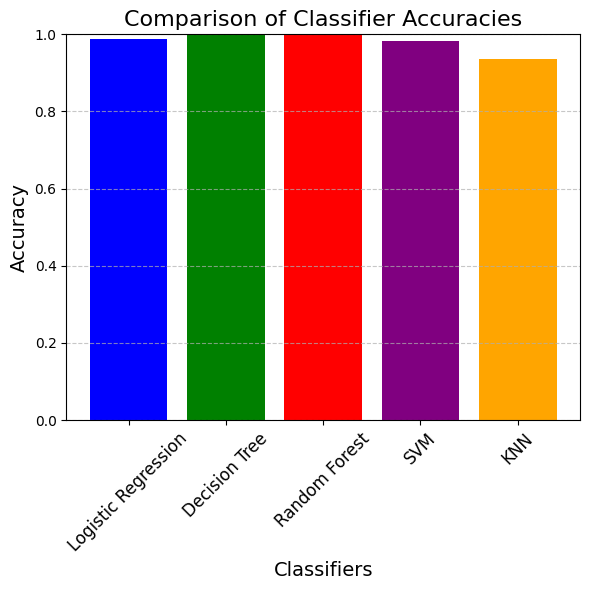

In [ ]:
import matplotlib.pyplot as plt

# Plotting the comparison of classifier accuracies
classifier_names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(6, 6))
plt.bar(classifier_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])

# Adding details to the plot
plt.title("Comparison of Classifier Accuracies", fontsize=16)
plt.xlabel("Classifiers", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


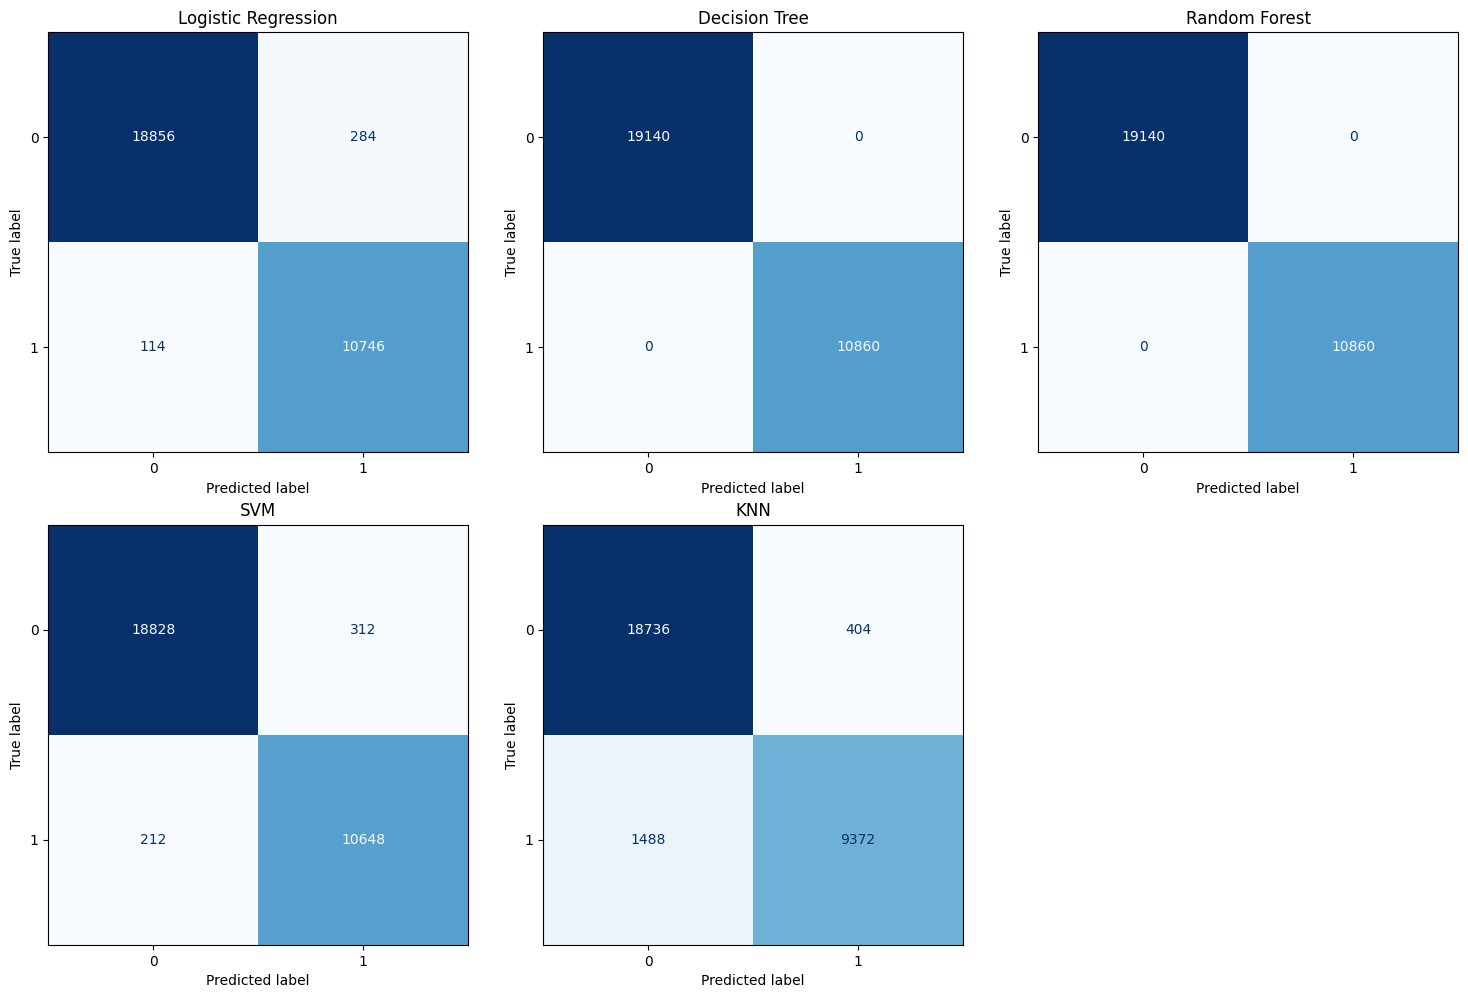

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrices for all classifiers
confusion_matrices = {}

for name, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm

# Plot confusion matrices
plt.figure(figsize=(15, 10))

for i, (name, cm) in enumerate(confusion_matrices.items(), start=1):
    plt.subplot(2, 3, i)  # Adjust grid size based on number of classifiers
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues', ax=plt.gca(), colorbar=False)
    plt.title(name)

plt.tight_layout()
plt.show()


In [ ]:
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5806 - loss: 8.2325 - val_accuracy: 0.6599 - val_loss: 0.6384
Epoch 2/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6749 - loss: 0.6230 - val_accuracy: 0.9134 - val_loss: 0.2526
Epoch 3/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9014 - loss: 0.2734 - val_accuracy: 0.9761 - val_loss: 0.0935
Epoch 4/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9620 - loss: 0.1300 - val_accuracy: 0.9726 - val_loss: 0.0828
Epoch 5/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9720 - loss: 0.0862 - val_accuracy: 0.9819 - val_loss: 0.0501
Epoch 6/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9793 - loss: 0.0627 - val_accuracy: 0.9811 - val_loss: 0.0585
Epoch 7/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9813 - loss: 0.0558 - val_accuracy: 0.9871 - val_loss: 0.0353
Epoch 8/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9839 - loss: 0.0484 -

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9887 - loss: 0.0281
Test Accuracy: 0.99


In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
